In [55]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.linalg import pinv

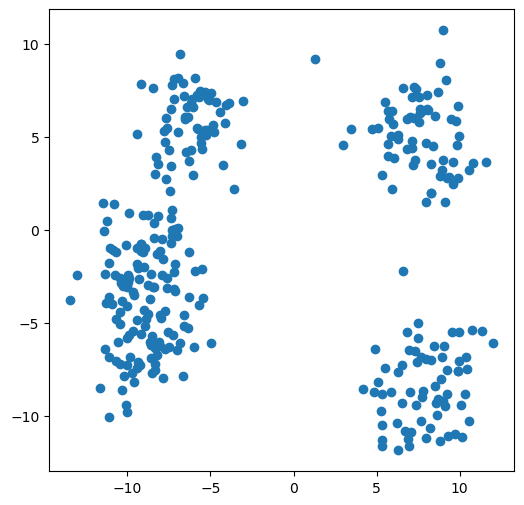

In [118]:
random.seed(234)
x,_=make_blobs(n_samples=330,centers=5,cluster_std = 1.84)
plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1])
plt.show()

# Mhalanobis Kmeans

1 .Khởi tạo: Chọn số cụm k và khởi tạo ngẫu nhiên k điểm làm trung tâm ban đầu của các cụm \\

2 .Tính S=cov \\

3 .Tính nghịch đảo của ma trận hiệp phương sai \\

4 .Gán nhãn: Tính khoảng cách Mahalanobis từ mỗi điểm đến các trung tâm cụm. Gán nhãn cho mỗi điểm dữ liệu vào cụm có khoảng cách Mahalanobis nhỏ nhất.\\

5 .Cập nhật trung tâm cụm\\

6 .Lặp lại bước 4 và 5: Lặp lại cho đến khi không có sự thay đổi đáng kể \\

7 .Kết thúc \\

8 .Đầu ra: các labels và trung tâm cụm cuối cùng

In [86]:
def step1(X, k):
    '''
    Khởi tạo các điểm center
    '''
    return X[np.random.choice(X.shape[0], k, replace=False)]
from scipy.linalg import pinv

def step23(X):
    '''
    Step 2 Tính ma trận hiệp phương sai S
    '''
    cov_matrix = np.cov(X.T)
    '''
    Step 3: tính nghịch đảo của S
    '''
    inv_cov_matrix = pinv(cov_matrix)
    return cov_matrix, inv_cov_matrix

def step4(X, centers, inverse_cov):
    '''
    Gán nhãn khi biết điểm center trong Mahalanobis K-means
    '''    
    D = cdist(X, centers, metric='mahalanobis', VI=inverse_cov)

    return np.argmin(D, axis=1)

def step5(X,labels,K):
    '''
    Cập nhật các điểm trung tâm
    '''
    return np.array([np.mean(X[labels == k], axis=0) for k in range(K)])

def visualize_clusters(x, pred):
    data = pd.DataFrame()
    data['x'] = x[:, 0]
    data['y'] = x[:, 1]
    data['label'] = pred

    groups = data.groupby('label')
    fig, ax = plt.subplots(figsize=(8, 6))

    for name, group in groups:
        ax.scatter(group.x, group.y, label=name)

    ax.legend()
    plt.show()

# Tạo center đầu cố định để so sánh GMM,KMeans, Mahalanobis 

In [119]:
first_center = step1(x,5)

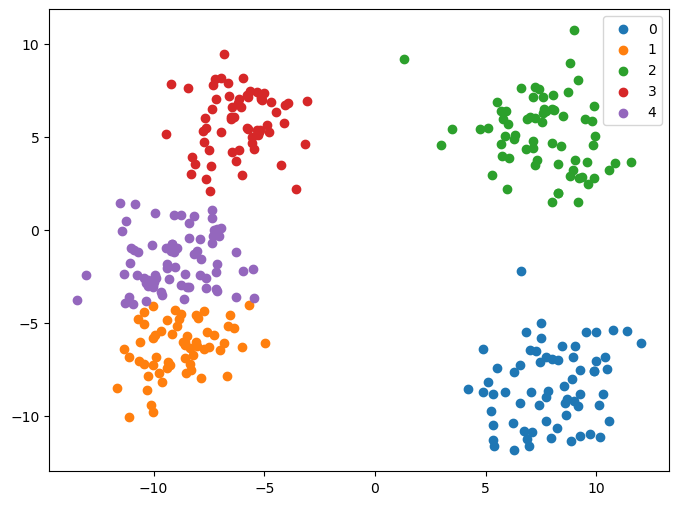

In [120]:
def mahalanobis_kmeans(X, K,center, max_iters=100, tol=1e-4):
    centers = center 
    
    for iteration in range(max_iters):
        cov_matrix , inverse_cov = step23(X)
        labels = step4(X, centers, inverse_cov)
        new_centers = step5(X,labels,K)

        if np.allclose(new_centers, centers, atol=tol):
            break
        centers = new_centers
    
    return centers, labels, iteration + 1
centers ,pred, _=mahalanobis_kmeans(x, 5,first_center, max_iters=100, tol=1e-4)
visualize_clusters(x, pred)

# Kmeans

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


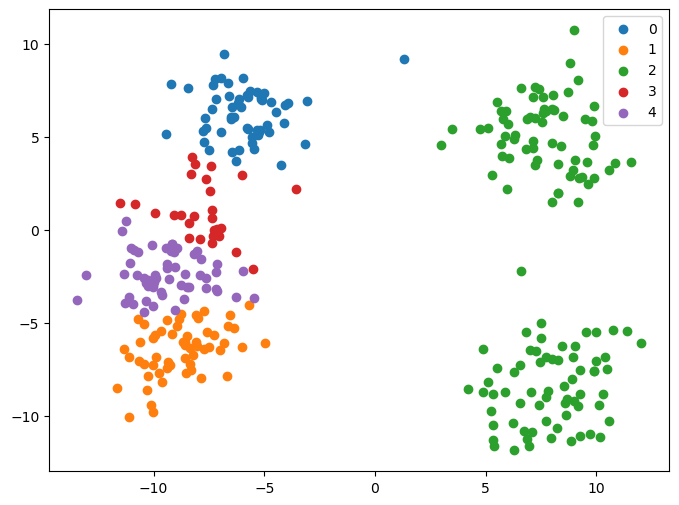

In [121]:

from sklearn.cluster import KMeans

def kmeans_clustering(X, k, init_centers=None):
    kmeans = KMeans(n_clusters=k, random_state=0, init=init_centers).fit(X)
    centers = kmeans.cluster_centers_
    pred_label = kmeans.predict(X)
    return centers,pred_label

Centers_kmeans , pred_Kmeans =kmeans_clustering(x, 5,first_center)
visualize_clusters(x, pred_Kmeans)

# Gaussian 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


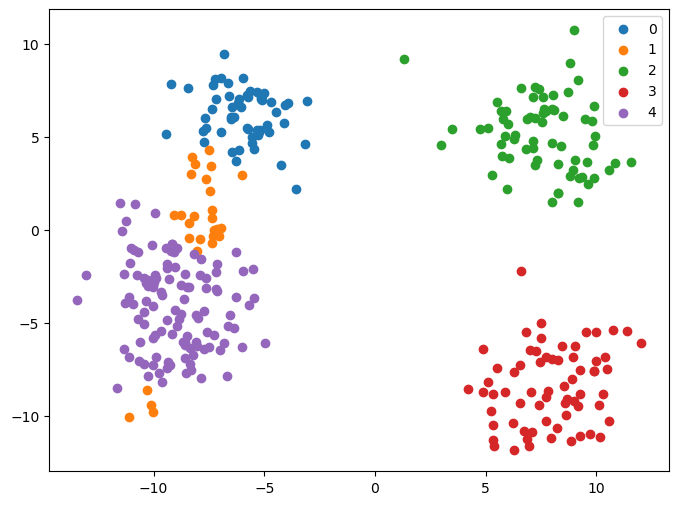

In [122]:
from sklearn.mixture import GaussianMixture

def Gau_Kmeans(X, K,init_centers=None):
    gm = GaussianMixture(n_components=K, random_state=0, means_init=init_centers).fit(X)
    centers = gm.means_
    pred = gm.predict(X)
    return centers, pred

Centers_Gau, pred_Gau = Gau_Kmeans(x,5,first_center)
visualize_clusters(x, pred_Gau)

Nhận xét: \
# Gaussian \
Dữ liệu không tuân theo phân phối Gaussian \
    
    => Gaussian không chọn đúng, không đạt hiệu quả \
# Kmeans \
Nhận thấy các điểm phân cụm chính xác hơn. Tuy nhiên, có sự chênh lệch số lượng các điểm trong cụm  \
    
    => Bộ dữ liệu các biến phi tuyến tính , Kmeans không đạt hiệu quả tốt \
# Mahalanobis \
Các điểm được phân cụm rõ ràng \
    
    => Mahalanobis cho kết quả tốt \
    
Hiệu quả: Mahalanobis > Kmeans > Gaussian 
